# Analysis and Visualization using R

Here is a small dataset for you to work with.

Each of 5 schools (A, B, C, D and E) is implementing the same math course this semester, with 35 lessons. There are 30 sections total. The semester is about 3/4 of the way through.

For each section, we record the number of students who are:

- very ahead (more than 5 lessons ahead)
- middling (5 lessons ahead to 0 lessons ahead)
- behind (1 to 5 lessons behind)
- more behind (6 to 10 lessons behind)
- very behind (more than 10 lessons behind)
- completed (finished with the course)


__2 Questions:__

1.	How does the status of students per school differ after ¾ of the semester?
2.	How does the number of students affect the study speed?

## 1.	Data Import

We begin the analysis by importing the dataset. I took a brief look at the dataset in R Studio and identified an existing header. Consequently, I set the import statement with header = TRUE

In [ ]:
> data.storyteller <- read.csv("C:/Users/steff/Google Drive/3 Masters/3. Semester/2 Data Analytics/Homework/HW2/data-storyteller.csv", header=TRUE)

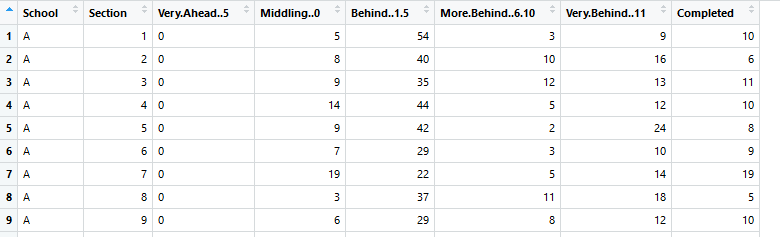

## 2. Loading Packages

I use five packages for my analysis

In [ ]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(ggpubr)
library(reshape2)

## 3. Analyze the structure of the dataset

I paid special attention to the data type of each attribute and decided to not change any data type at this point.

In [ ]:
> str(schooldata)
'data.frame':	30 obs. of  8 variables:
 $ School    : Factor w/ 5 levels "A","B","C","D",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Section   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Veryahead : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Middling  : int  5 8 9 14 9 7 19 3 6 13 ...
 $ Behind    : int  54 40 35 44 42 29 22 37 29 40 ...
 $ MoreBehind: int  3 10 12 5 2 3 5 11 8 5 ...
 $ VeryBehind: int  9 16 13 12 24 10 14 18 12 5 ...
 $ Completed : int  10 6 11 10 8 9 19 5 10 20 ...

Moreover, I did not identify any empty cells:


In [ ]:
> summary(schooldata)
 School    Section        Veryahead    Middling         Behind        MoreBehind       VeryBehind       Completed    
 A:13   Min.   : 1.00   Min.   :0   Min.   : 2.00   Min.   : 4.00   Min.   : 0.000   Min.   : 0.000   Min.   : 1.00  
 B:12   1st Qu.: 2.25   1st Qu.:0   1st Qu.: 4.25   1st Qu.:15.25   1st Qu.: 1.000   1st Qu.: 1.250   1st Qu.: 6.00  
 C: 3   Median : 5.50   Median :0   Median : 7.50   Median :22.00   Median : 2.000   Median : 5.500   Median :10.00  
 D: 1   Mean   : 5.90   Mean   :0   Mean   : 7.40   Mean   :25.13   Mean   : 3.333   Mean   : 6.967   Mean   :10.53  
 E: 1   3rd Qu.: 9.00   3rd Qu.:0   3rd Qu.: 9.75   3rd Qu.:34.25   3rd Qu.: 4.750   3rd Qu.:11.500   3rd Qu.:14.00  
        Max.   :13.00   Max.   :0   Max.   :19.00   Max.   :56.00   Max.   :12.000   Max.   :24.000   Max.   :27.00 

However, the header is difficult to read:

In [ ]:
> head(schooldata)
  School Section Very.Ahead..5 Middling..0 Behind..1.5 More.Behind..6.10 Very.Behind..11 Completed
1      A       1             0           5          54                 3               9        10
2      A       2             0           8          40                10              16         6
3      A       3             0           9          35                12              13        11
4      A       4             0          14          44                 5              12        10
5      A       5             0           9          42                 2              24         8
6      A       6             0           7          29                 3              10         9

As each attribute is already described in the instruction quote, I excluded the numbers behind the header to improve clarity.

#Change header names
names <- c("School", "Section", "Veryahead", "Middling", "Behind", "MoreBehind", "VeryBehind", "Completed")
colnames(schooldata) <- names

In [ ]:
> head(schooldata)
  School Section Veryahead Middling Behind MoreBehind VeryBehind Completed
1      A       1         0        5     54          3          9        10
2      A       2         0        8     40         10         16         6
3      A       3         0        9     35         12         13        11
4      A       4         0       14     44          5         12        10
5      A       5         0        9     42          2         24         8
6      A       6         0        7     29          3         10         9

## 1.	How does the status of students per school differ after ¾ of the semester?

I restructured the dataset to gain an overview about the number of students, studying at which school -at which section and -on what level:

In [ ]:
#Restructure the Dataset
schooldata_new <- gather(schooldata,status,number,3:8)

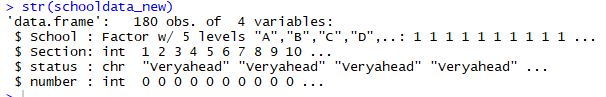

In order to examine the performance of the schools and the sections, I need to pay special attention the status of each observation in the new table “schooldata_new”.
I have decided to introduce levels for the attribute status as I can order them in regard to the progress of the students. Then, I convert the data type “character” to “factor” and I assign a number for each of the level. This means, “Completed” =1, “Veryahead” = 2, “Middling” = 3, “Behind“ = 4, “MoreBehind” = 5 and “VeryBehind” = 6.


In [ ]:
#change the data type of status from character to factor by introducing levels and converting them to numbers
levels = c("Completed", "Veryahead", 'Middling', 'Behind', 'MoreBehind', 'VeryBehind')
schooldata_new$status <- factor(schooldata_new$status, levels = c("Completed", "Veryahead", 'Middling', 'Behind', 'MoreBehind', 'VeryBehind'))

schooldata_new2 <- schooldata_new %>% mutate_at(vars(status), as.numeric)

To be able to make a statement about the performance/status/speed of each school, we need the average status for each school. Therefore, I extend the table “schooldata_new3” by another column that consists of status * number and calculate the average by summing it up and dividing it by the total number of students per school.

In [ ]:
schooldata_new3 <- schooldata_new2 %>% mutate(status2 = status * number)

#How does each school performe?
schoolsummary2 <- schooldata_new3 %>% group_by(School) %>% summarize(status1 = sum(status2)/sum(number))
ggplot(schoolsummary2, aes(x = School, y = status1)) + geom_bar(stat="identity", fill="steelblue") + ylab("Average Performance, Lower = Better") + ggtitle("Performance of Students per School")

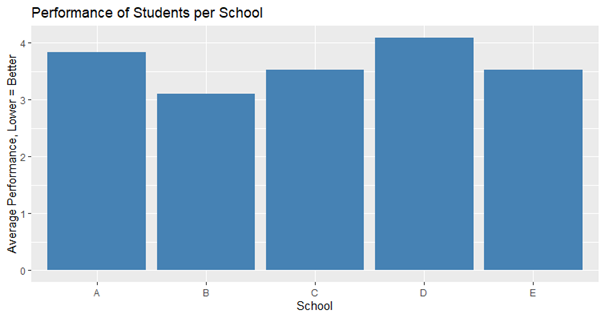

The visualization shows that the students in school B have made on average the most progress after ¾ of the semester. Contrary, on average the students in School A and school B have made the least progress. 

To gain a more detailed look of each school and identify differences in between them, I will visualize the share of students who fall in each status level.

In [ ]:
schooldata_new$status <- factor(schooldata_new$status, levels = c("Completed", "Veryahead", 'Middling', 'Behind', 'MoreBehind', 'VeryBehind'))

schoola <- filter(schooldata_new, School == "A")
schoola1 <- schoola %>% group_by(School, status) %>% summarize(numStudents = sum(number)/932)

schoolb <- filter(schooldata_new, School == "B")
schoolb1 <- schoolb %>% group_by(School, status) %>% summarize(numStudents = sum(number)/446)

schoolc <- filter(schooldata_new, School == "C")
schoolc1 <- schoolc %>% group_by(School, status) %>% summarize(numStudents = sum(number)/85)

schoold <- filter(schooldata_new, School == "D")
schoold1 <- schoold %>% group_by(School, status) %>% summarize(numStudents = sum(number)/22)

schoole <- filter(schooldata_new, School == "E")
schoole1 <- schoole %>% group_by(School, status) %>% summarize(numStudents = sum(number)/116)


#aggregation
jointdataset <- rbind(schoola1, schoolb1, schoolc1, schoold1, schoole1)
jointdataset

#Percentage of Students per status per School
abcde <- ggplot(jointdataset, aes(x=status, y=numStudents, fill=factor(School)))+
  geom_bar(position="dodge", stat="identity") + ylab("Percentage of Students")
abcde

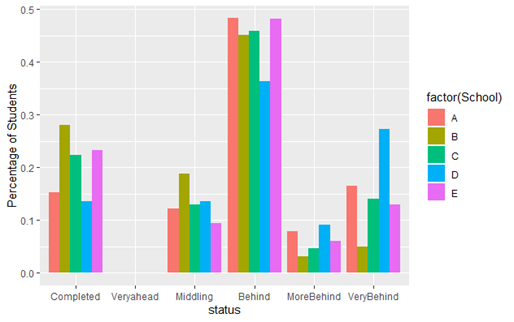

Here, you can see the difference of each school. It shows that school B has the highest share of students in status “completed” as well as in status “middling”.

The different progress of each school will even get more obvious when comparing the share of students who are currently behind: 


In [ ]:
schoola_Behind <- sum(schoola1$numStudents[4:6])
schoolb_Behind <- sum(schoolb1$numStudents[4:6])
schoolc_Behind <- sum(schoolc1$numStudents[4:6])
schoold_Behind <- sum(schoold1$numStudents[4:6])
schoole_Behind <- sum(schoole1$numStudents[4:6])

> schoola_Behind
[1] 0.7263948
> schoolb_Behind
[1] 0.5313901
> schoolc_Behind
[1] 0.6470588
> schoold_Behind
[1] 0.7272727
> schoole_Behind
[1] 0.6724138

This confirms the first plot about the average of the performance and shows that School B has the lowest share of students that are behind. School a and school d have the highest share of students who lack behind. 

## 2. Which factor(s) affect the different study speeds?

To identify the factors, we need to get a better understanding about each school. We can look at each of the school and summarize the available data:

In [ ]:
#how many sections does each school have and how many students in total?
summary2 <- schooldata_new %>% group_by(School) %>% summarize(numSections = max(Section), numStudents = sum(number))
head(summary2)

> head(summary2)
#A tibble: 5 x 3
  School numSections numStudents
  <fct>        <int>       <int>
1 A               13         932
2 B               12         446
3 C                3          85
4 D                1          22
5 E                1         116

As you can see, School B has much more students than School D but, as we have seen earlier, the students in School B perform much better than the students in School D. Consequently, the pure number of students per school cannot be the reason for the different progress.

However, the number of sections differ and thus, I will take a closer look at the sections and the size of the sections:


In [ ]:
#size of sections
#individually
summary3 <- schooldata_new %>% group_by(School, Section) %>% summarize(numStudents = sum(number))

#aggregation
abcde1 <- ggplot(summary3, aes(x=Section, y=numStudents, fill=factor(School)))+
  geom_bar(position="dodge", stat="identity") + ylab("Number of Students")
abcde1

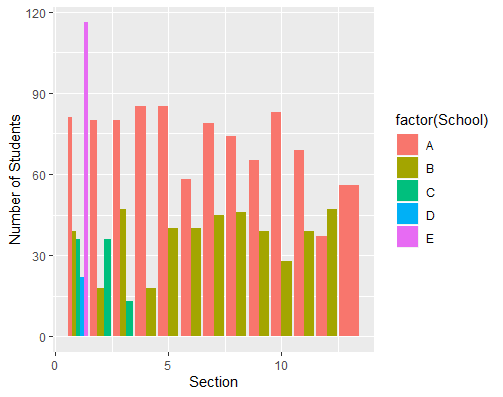

It becomes clear that the number of students per section differ. A and E have the highest numbers have students per section.
Possibly, the number of students per section can have an effect on the performance of the students. Therefore, I will visualize the number of students per section and compare it with the average progress of the section: 


In [ ]:
#AVG student Performance vs section size
ggplot(schoolsummary, aes(x = NumStudents, y = status1, color = School, group = School)) + ylab("Average Student Performance") + ggtitle("AVG Student Performance vs. Section Size") + geom_point(lwd = 4)

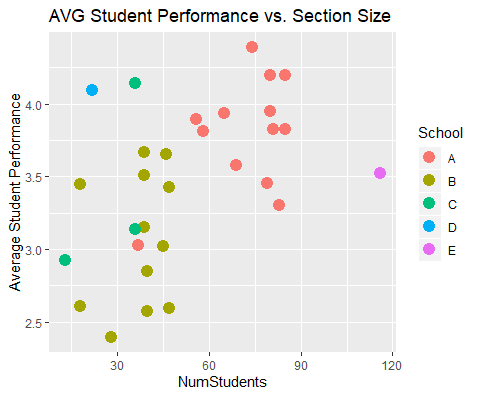

The number of students per section seems to be positive correlated to the average progress of section. To better examine this correlation, I will draft a regression: I will propose the null hypothesis (H0) that the number of students has no effect on the average status. Alternatively, the H1 hypothesis assumes that independent variable “Number of students” has an effect on the average status of the section.

In [ ]:
#Regression 
ggscatter(schoolsummary, x = "NumStudents", y = "status1", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Number of Students", ylab = "AVG Status (higher = worse performance)")


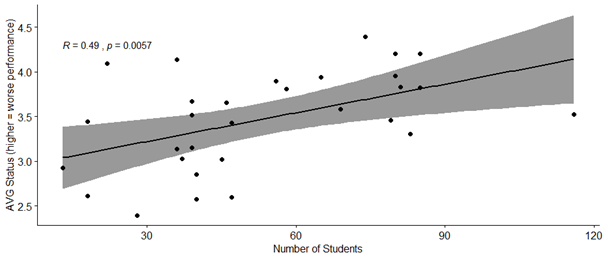

The scatter plot unveils a positive correlation of the number of Students and the average status per section. A high number of students per section is associated with a worse average performance of that section.

The p-value indicates that the number of students is statistically significant. The P value provides information about the probability of finding the observed or more extreme results when the null hypothesis (H0) is true. As p = 0.0057, I will reject the null hypothesis and accept the alternative hypothesis that there is a relationship.

However, the strong variation indicates that only the number of students per section does not sufficiently explain the average of sections’ students status. This becomes clear when looking at the average status of school E. The school has only 1 section with over 100 students but the average student status is still better than the sections of other schools with a lower number of student.
